#### In this notebook decision tree will be use to predict diameter, absorbance, and PL output.
* Optimization will be run to find the optimized max_depth number 
* The skill of the model will be reported as an error in those predictions: 
    * MSE
    * R2
    * RMSE
    * MAE

In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np
import scipy.stats as stats
import scipy

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso
from pandas import DataFrame


# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from tqdm import tqdm

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

In [2]:
# Loads the Augmented Dataset with no None Values
df = pd.read_csv('../../../Datasets/augmented_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


In [3]:
# Defines the input and output for the 3 models
feature_names = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)',
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)',
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate',
             'x0_cadmium acetate dihydrate', 'x0_cadmium oxide',
             'x0_cadmium stearate', 'x0_dimethylcadmium', 'x1_None',
             'x1_benzoic acid', 'x1_dodecylphosphonic acid',
             'x1_ethylphosphonic acid', 'x1_lauric acid',
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline',
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine',
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine',
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine',
             'x3_tributylphosphine', 'x3_trioctylphosphine',
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin',
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide',
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide']

target = ['Diameter_nm', 'Absorbance max (nm)', 'PL max (nm)']


## Size Prediction

In [4]:
#target is diameter_nm

X1 = df[feature_names]
Y1 = df[target[0]]

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=8, shuffle = True)

In [7]:
#optimization of max_depth
R2_dict = {}
    
for max_depth in tqdm(np.arange (1, 1000, 1)):
    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X_train1,y_train1)
    y_pred1 = regr.predict(X_test1)
    MSE = mean_squared_error(y_test1, y_pred1)
    R2 = r2_score(y_test1, y_pred1)
    R2_dict[max_depth] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [00:06<00:00, 151.95it/s]

best estimator =  436


In [6]:
regr = DecisionTreeRegressor(max_depth=436)
regr.fit(X_train1, y_train1)
y_pred1 = regr.predict(X_test1)
print("Squared Prediction error MSE: ", mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('R Squared Score is:', r2_score(y_test1, y_pred1))

Squared Prediction error MSE:  0.7932269052542371
Root Mean Squared Error: 0.8906328678272755
Mean Absolute Error: 0.49028305084745766
R Squared Score is: 0.5618476704776728


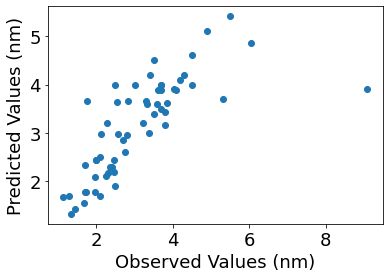

In [7]:
plt.figure()
plt.title("")
plt.plot(y_test1, y_pred1, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

## Absorbance prediction

In [10]:
#target Absorbance max (nm)
X2= df[feature_names]
Y2= df[target[1]]

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=8, shuffle = True)

In [12]:
R2_dict = {}
    
for max_depth in tqdm(np.arange (1, 1000, 1)):
    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X_train2,y_train2)
    y_pred2 = regr.predict(X_test2)
    MSE = mean_squared_error(y_test2, y_pred2)
    R2 = r2_score(y_test2, y_pred2)
    R2_dict[max_depth] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [00:06<00:00, 152.35it/s]

best estimator =  30


In [27]:
regr = DecisionTreeRegressor(max_depth = 30)
regr.fit(X_train2, y_train2)
y_pred2 = regr.predict(X_test2)

print("Squared Prediction error MSE: ", mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('R Squared Score is:', r2_score(y_test2, y_pred2))

Squared Prediction error MSE:  856.1606779661021
Root Mean Squared Error: 29.26022347771975
Mean Absolute Error: 19.501694915254244
R Squared Score is: 0.8326745571203034


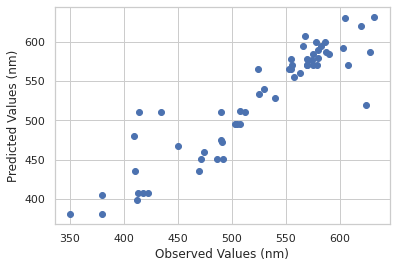

In [34]:
plt.figure()
plt.title("")
plt.plot(y_test2, y_pred2, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

## PL prediction

In [15]:
#target PL max (nm)
X3= df[feature_names]
Y3= df[target[2]]

In [16]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25, random_state=8, shuffle = True)

In [31]:
R2_dict = {}
    
for max_depth in tqdm(np.arange (1, 1000, 1)):
    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X_train3,y_train3)
    y_pred3 = regr.predict(X_test3)
    MSE = mean_squared_error(y_test3, y_pred3)
    R2 = r2_score(y_test3, y_pred3)
    R2_dict[max_depth] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [00:05<00:00, 166.52it/s]

best estimator =  895


In [32]:
regr = DecisionTreeRegressor(max_depth=895)
regr.fit(X_train3, y_train3)
y_pred3 = regr.predict(X_test3)
print("Squared Prediction error MSE: ", mean_squared_error(y_test3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred3))
print('R Squared Score is:', r2_score(y_test3, y_pred3))

Squared Prediction error MSE:  870.0063991722933
Root Mean Squared Error: 29.49587088343542
Mean Absolute Error: 16.95641646440678
R Squared Score is: 0.502834942565302


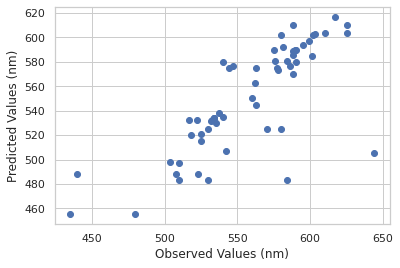

In [33]:
plt.figure()
plt.title("")
plt.plot(y_test3, y_pred3, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

In [20]:
#difference between RMSE and MAE
#the larger the difference btween them the more inconsistent the error size
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))

MAE1 = metrics.mean_absolute_error(y_test1, y_pred1)
MAE2 = metrics.mean_absolute_error(y_test2, y_pred2)
MAE3 = metrics.mean_absolute_error(y_test3, y_pred3)

RMSE1_MAE1_diff = RMSE1 - MAE1
RMSE2_MAE2_diff = RMSE2 - MAE2
RMSE3_MAE3_diff = RMSE3 - MAE3

print(RMSE1_MAE1_diff)
print(RMSE2_MAE2_diff)
print(RMSE3_MAE3_diff)


0.36396152974349194
8.289100207944717
10.359324477226995


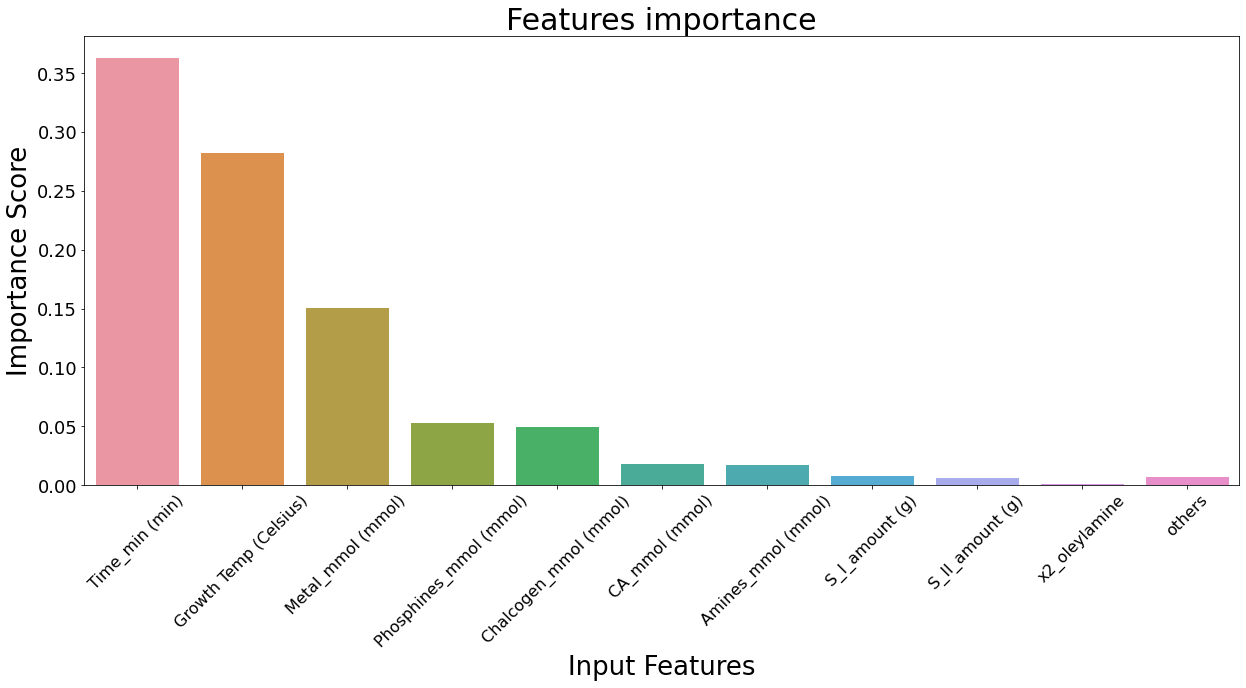

In [8]:
# Depositing the input features and their importance score into a dicitonary
importance_dict = dict()
for i in range(0,48):
    importance_dict[feature_names[i]] = regr.feature_importances_[i]

# Sorting the input features by their importance score    
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
# Filtering out input features with the best importance score
top10 = DataFrame(sorted_importance[0:10], columns=['features', 'importance score'])
# Combining the other input features
others2 = DataFrame(sorted_importance[10:], columns=['features', 'importance score'])
combined_others2 = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others2['importance score'].sum()]
                                        })
# Combining top 10 with others
imp_score2 = pd.concat([top10, combined_others2])

# Plotting 

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_theme(style="whitegrid")

plt.xticks(rotation=45, fontsize=16)

ax.set_title('Features importance', fontsize=30)

ax = sns.barplot(x="features", y="importance score", data=imp_score2)

ax.set_xlabel('Input Features', fontsize=26)
ax.set_ylabel('Importance Score', fontsize=26)

plt.show()

Variable Growth Temp and Time_min have higher importance in relation to other variables. They can be used as the main feature of the model

## Cross-validation 

In [ ]:
reg = Lasso()

In [ ]:
lassoParam = {
    'alpha': stats.uniform(0.0001, 0.01),
}

In [ ]:
#prepare two Kfolds, one is for the outer loop, the other is for inner loop
outer_cv = KFold(n_splits=5, shuffle=True, random_state=8) 
inner_cv = KFold(n_splits=5, shuffle=True, random_state=8)

In [ ]:
#this will choose the best hyperparameter
nestedcv_inner = RandomizedSearchCV(reg, lassoParam, cv=inner_cv, n_iter=20, scoring='r2', 
                                    n_jobs=-1, random_state=8, refit=True) 

In [ ]:
#This will give generalized error by LASSO with hyperparamter chosed in inner loop.
nestedcv_outer = cross_validate(nestedcv_inner,X_train1,y_train1,scoring='r2',cv=outer_cv,
                                n_jobs=-1,return_estimator=True)

In [ ]:
#Chosen hyperparameter in each inner CV
print([nestedcv_outer['estimator'][i].best_params_ for i in range(5)])

We have the same alpha value, the aplha value could have been smaller. However the good thing is that we are finding the same best parameter when walking through the same parameter candidate.
The above code has for reference [here](https://towardsdatascience.com/hyperparameter-tuning-explained-d0ebb2ba1d35).

In [ ]:
#Outer loop CV scores
print(nestedcv_outer['test_score'])